In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_gaussian_quantiles

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

In [ ]:
N = 500
X, Y = make_gaussian_quantiles(mean=None, cov=0.5, n_samples = N,  n_features = 2, n_classes=2, shuffle = True, random_state = 42)

X = X.T
Y = Y.reshape(1, len(Y))

print(X.shape)
print(Y.shape)

(2, 500)
(1, 500)


In [ ]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

In [ ]:
def tanh(z):
    tan = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return tan

In [ ]:
def layer_sizes(X, Y):
    """
    Returns:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    """

    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]

    return n_x, n_h, n_y

In [ ]:
def initialize_params(n_x, n_h, n_y):

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    return W1, b1, W2, b2

In [ ]:
def forward_propagation(X, W1, b1, W2, b2):

    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    return Z1, A1, Z2, A2

In [ ]:
def compute_cost(Y, A2):

    m = Y.shape[1]
    cost = (-1/m) * np.sum(np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2)))
    cost = float(np.squeeze(cost))
    return cost

In [ ]:
def backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2):

    m = X.shape[1] # Number of training examples

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * (np.sum(dZ2, axis = 1, keepdims = True))

    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * (np.dot(dZ1, X.T))
    db1 = (1/m) * (np.sum(dZ1, axis = 1, keepdims = True))

    return dW1, db1, dW2, db2

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, b1, W2, b2

In [ ]:
def neural_network(X, Y, n_h, learning_rate, num_iterations = 500):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    costs = []
    # Initialize parameters
    W1, b1, W2, b2 = initialize_params(n_x, n_h, n_y)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        cost = compute_cost(Y, A2)
        if i % 10 == 0:
            costs.append(cost)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    return W1, b1, W2, b2, costs


In [ ]:
def predict(W1, b1, W2, b2, X):

    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)

    m = X.shape[1]
    y_pred = np.zeros((1, m))
    for i in range(A2.shape[1]):
        if A2[0, i] >= 0.5:
            y_pred[0, i] = 1
        else:
            y_pred[0, i] = 0

    return y_pred

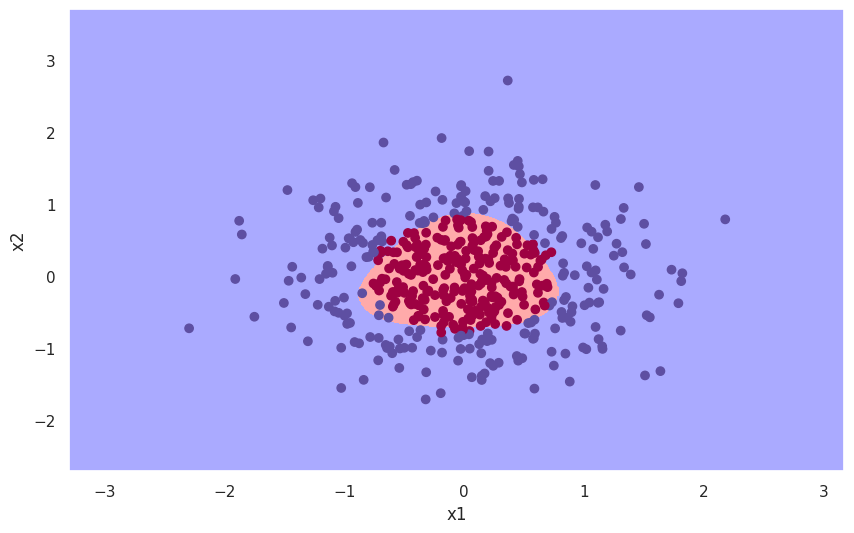

In [ ]:
def plot_decision_boundary(model, X, Y):

    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize = (10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c = Y, cmap=plt.cm.Spectral)
W1, b1, W2, b2, costs = neural_network(X, Y, n_h = 4, learning_rate= 1, num_iterations= 1000)
plot_decision_boundary(lambda x: predict(W1, b1, W2, b2, x.T), X, Y)

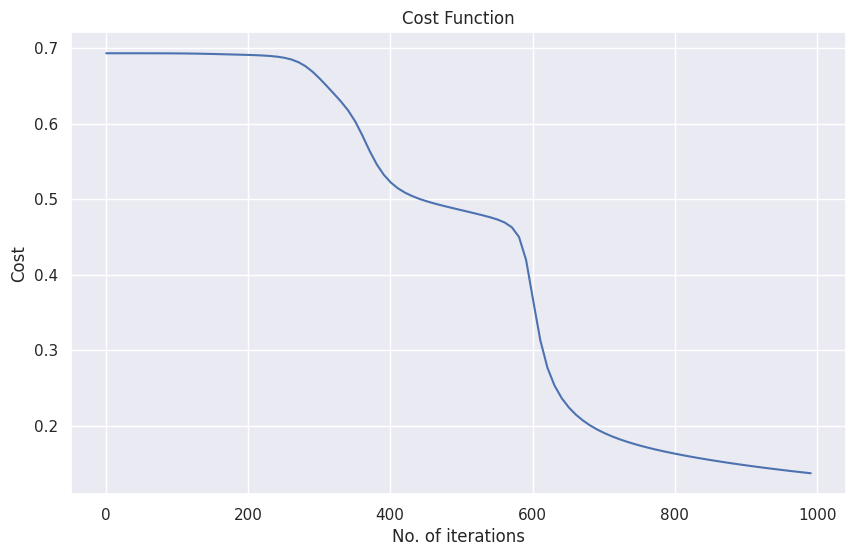

In [ ]:
plt.figure(figsize = (10, 6))
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(range(1, 1001, 10), costs)
plt.show()

In [ ]:
# Print accuracy
predictions = predict(W1, b1, W2, b2, X)
accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size) * 100)
print (f'Accuracy: {round(accuracy, 2)} %')

Accuracy: 95.6 %


<ipython-input-17-e9b93ef15c8c>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size) * 100)
